In [2]:
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import History
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#Data Agumentaion

train_data_dir='cell_images/'

datagen = ImageDataGenerator(
    rescale = 1.0/255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip = True,
    validation_split=0.1
)


batch_size = 48
num_classes = 2
image_size = 64

In [3]:
train_generator = datagen.flow_from_directory(
    train_data_dir,
    target_size = (image_size, image_size),
    batch_size = batch_size,
    class_mode = 'binary',
    subset='training'
)

dev_generator = datagen.flow_from_directory(
    train_data_dir,
    target_size = (image_size, image_size),
    batch_size = batch_size,
    class_mode = 'binary',
    subset='validation'
)

Found 24804 images belonging to 2 classes.
Found 2754 images belonging to 2 classes.


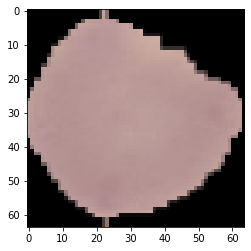

In [4]:
sample = train_generator.next();
plt.imshow(sample[0][0])
train_generator.reset()

In [5]:
model = Sequential()
model.add(Conv2D(64,(3,3),input_shape=(image_size,image_size,3),activation='relu'))

model.add(Conv2D(64,(3,3),input_shape=(image_size,image_size,3),activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),input_shape=(image_size,image_size,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(128,(3,3),input_shape=(image_size,image_size,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))



In [6]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])



In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 64)        1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 60, 60, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 30, 30, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 128)       0

In [11]:
history=model.fit(
    train_generator,
    steps_per_epoch=2000 // batch_size,
    epochs=40,
    validation_data=dev_generator,
    validation_steps=800 // batch_size)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 41 steps, validate for 16 steps
Epoch 1/40
41/41 [==============================] - 102s 2s/step - loss: 0.1799 - accuracy: 0.9441 - val_loss: 0.2131 - val_accuracy: 0.9271
Epoch 2/40
41/41 [==============================] - 76s 2s/step - loss: 0.1449 - accuracy: 0.9512 - val_loss: 0.1997 - val_accuracy: 0.9271
Epoch 3/40
41/41 [==============================] - 63s 2s/step - loss: 0.1490 - accuracy: 0.9522 - val_loss: 0.2203 - val_accuracy: 0.9297
Epoch 4/40
41/41 [==============================] - 57s 1s/step - loss: 0.1682 - accuracy: 0.9487 - val_loss: 0.3353 - val_accuracy: 0.8971
Epoch 5/40
41/41 [==============================] - 54s 1s/step - loss: 0.1610 - accuracy: 0.9507 - val_loss: 0.2287 - val_accuracy: 0.9271
Epoch 6/40
41/41 [==============================] - 44s 1s/step - loss: 0.1529 - accuracy: 0.9568 - val_loss: 0.1945 - val_accuracy: 0.9219
Epoch 7/40
41/41 [==============================] - 45s 1s/step - l

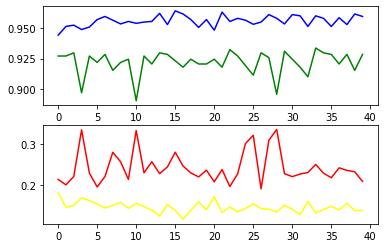

In [12]:
metrics = history.history

plt.subplot(211)

plt.plot(metrics['accuracy'],color='blue')
plt.plot(metrics['val_accuracy'],color='green')

plt.subplot(212)

plt.plot(metrics['loss'],color='yellow')
plt.plot(metrics['val_loss'],color='red')